In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
birdData = pd.read_csv("bird_migration.csv")


In [3]:
birdNames = pd.unique(birdData.bird_name)
birdNames

array(['Eric', 'Nico', 'Sanne', nan], dtype=object)

In [4]:
i = birdData.bird_name == "Eric"
x,y = birdData.longitude[i], birdData.latitude[i]

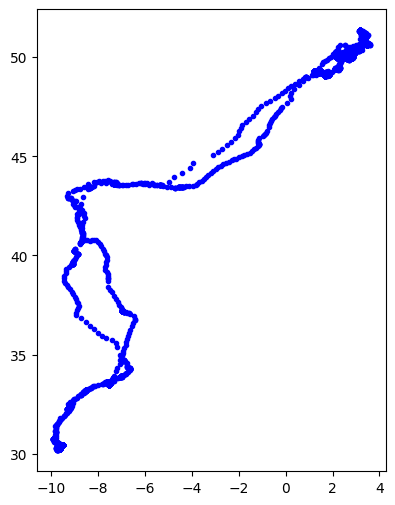

In [5]:
plt.figure(figsize = (4.5,6))
plt.plot(x,y,"b.")

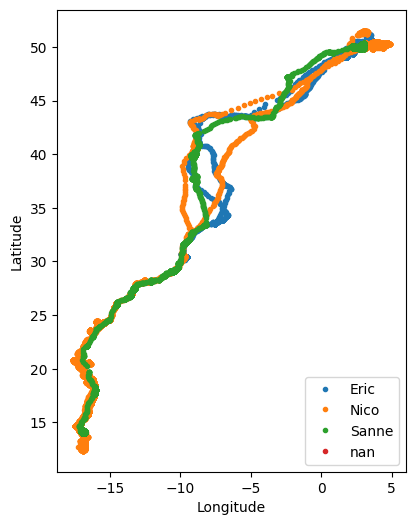

In [6]:

plt.figure(figsize = (4.5,6))
for name in birdNames:
            i = birdData.bird_name == name
            x,y = birdData.longitude[i], birdData.latitude[i]
            plt.plot(x,y,".", label=name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")


In [7]:
timestamps = []
for k in range(len(birdData)):
            timestamps.append(datetime.datetime.strptime(birdData.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birdData["timestamp"] = pd.Series(timestamps, index = birdData.index)

In [8]:
data = birdData[birdData.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time-times[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

In [9]:
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
            if t < next_day:
                        inds.append(i)
            else:
                        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
                        next_day += 1
                        inds = []

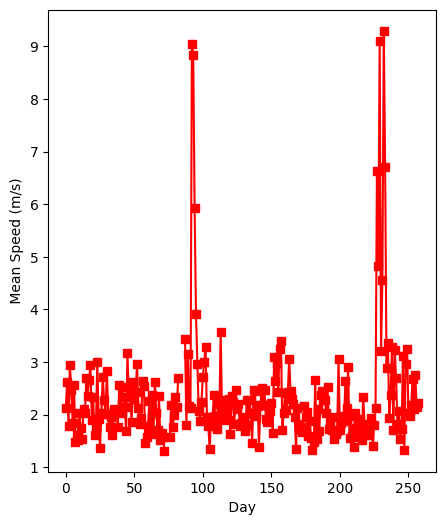

In [10]:
plt.figure(figsize = (5,6))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s) ");
plt.show()